#### Disclaimer: Algunas gràficas interactivas realizadas con el suporto de $plotly$  puede que no se visualizen correctamente. <br>O sea, pierdan la interactividad, no obstante la hoja corriente sea en layout html de jupyter notebook,<br> en tal caso se proporcionaràn enlaces para la visualizaciòn segura al 100%.
<br> "version 2" contiene los mismos resultados pero es en formato pdf clàsico

**El script del programa se encuentra en este mismo informe, para ir directamente al mismo, màs abajo [clique aqui](#chicago)**

# Càlculo numerico

### $Objetivos$ $de$ $la$ $tarea$.<br>
El trabajo consistirá en la realización de un programa en R sobre alguna aplicación
numérica de libre elección por parte del alumno. <br>Miembros:<br>
* **José Valencia Figueroa.**
* **NIUB:** **17697831**<br>
* **DNI:** **0924199797**.

### $Organigrama$ $resumido.$

**La aplicaciòn propuesta tendrà como principal finalidad, la automatizaciòn de 3 objetivos.**

El $1°$ consistirà en graficar funciones cohortes manera **<font color='darkblue'>interactiva.</font>** <br>O sea de permitir ver, simplemente pasando el ratòn,  en cada edad deseada:

* Numero de sobrevivientes $l_{x}$
* Esperanza de vida en cada edad $e_{x}$
* Edad $x$<br>

El $2°$ permitirà la realizaciòn de la **<font color='darkorange'>tabla actuarial bàsica.</font>**. Segùn el siguente esquema:<br>

| EDAD | FUNCION COORTE | FUNCION DE MORTALIDAD | TANTO ANUAL DE MORTALIDAD | TANTO ANUAL DE SUPERVIVENCIA | FUNCION CENSAL DE SUPERVIVENCIA |TANTO CENTRAL DE MORTALIDAD  | ESPERANZA DE VIDA
|------|----------------------------------------|----------------------------------------|---------------------------------------------------|----------------------------------------|------------------------|--------------|-----------------
| $x$    | $l(x)$                                   |$d(x)$                                   | $q(x)$                                              | $p(x)$                                   | $Lx$ |$m(x)$| $e(x)$|<br>


<br>

Finalmente en la $3°$ funcionalidad serà retornar las **<font color='red'>conmutaciones.</font>**<br>

En las tablas actuariales, que se utilizan en seguros, es habitual encontrar una serie de columnas encabezadas con letras mayúsculas.<br> Cada una de ellas representa un símbolo de conmutación que, no es más que una función matemática que combina <br>alguno de los elementos de la tabla con factores financieros. <br>Su objeto es facilitar la comprensión y el cálculo de las operaciones actuariales.<br>

El esquema a seguir serà el siguiente:<br>

|Conmutaciones|
|-------------|
 |$l(x)$|
 |$Cx$|     
 |$Dx$|   
 |$Nx$|       
 |$Mx$|       
 |$Rx$|
 |$Sx$|

# $ La$  $ automatizaciòn$

El hincapié principal que la aplicaciòn propone es el de **AUTOMATIZAR** los calculos y la graficaciòn.
<br>

O sea, solo serà suficiente teclear el nombre del paìs que queramos tomar en consideraciòn y premer enter. <br> Antes de proceder a presentarla, es deber presentar la base de datos con las que vamos a trabajar.<br>
La base de datos hace referencia a los paises del G20 y que fue descargada desde **kaggle**. <br>
El siguiente enlace redirige al mismo [Dataset lifeTables](https://www.kaggle.com/cthierfelder/life-table-g20).
<br> Si bien la base contenga varias cohortes, la aplicaciòn se enfocarà en los paises del **G8** *(RUSIA INCUIDA)*,<br> en particular en las $l_{x}$ de las mujeres de dichos paises.

### $El$ $Dataset$

In [1]:
cohortes_g20 <- read.csv('lifeTable.csv')
head(cohortes_g20)

,age,Australia_Male,Austria_Male,Belgium_Male,Bulgaria_Male,Canada_Male,Czech.Republic_Male,Denmark_Male,Estonia_Male,Finland_Male,...,Netherlands_Female,Poland_Female,Portugal_Female,Russia_Female,Slovakia_Female,Slovenia_Female,Spain_Female,Sweden_Female,United.Kingdom_Female,United.States_Female
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,100000,100000,100000,100000,100000,100000,100000,100000,100000,...,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
2,1,99528,99600,99620,98938,99488,99698,99689,99582,99740,...,99649,99493,99693,99279,99526,99747,99713,99759,99583,99415
3,2,99495,99572,99570,98887,99453,99674,99663,99521,99723,...,99624,99461,99657,99205,99486,99727,99682,99735,99558,99376
4,3,99471,99545,99549,98854,99433,99646,99657,99521,99717,...,99609,99443,99639,99160,99444,99717,99669,99718,99538,99351
5,4,99458,99528,99528,98795,99421,99637,99654,99521,99707,...,99595,99424,99626,99130,99414,99706,99657,99700,99522,99332
6,5,99444,99521,99511,98769,99410,99627,99642,99507,99697,...,99583,99408,99618,99099,99379,99695,99644,99699,99509,99317


### El esquema/leyenda a seguir


| Paises G8 | Cohortes Femeninas|
|-----------|--------------------|
|1 |United.States_Female|
|2 |United.Kingdom_Female|
|3 |Canada_Female|
|4 |France_Female|
|5 |Italy_Female|
|6 |Germany_Female|
|7 |Japan_Female|
|8 |Russia_Female|

# $Implementaciòn$

Supongamos que queremos el grafico de las **francesas**:
<br>Entonces, llamando la funciòn **aplicacion_actuarial** obtenemos:

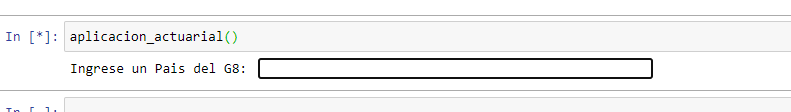

En primer lugar el programa nos solicita que ingresemos un *input*, en nuestro caso de *class str*, al pedirnos un paìs del G8.<br> Queda claro que el programa se detendrà si el Paìs en cuestiòn no hace parte del G8, e imprimirà un mensaje. Ejemplo:

In [7]:
aplicacion_actuarial()

Ingrese un Pais del G8: Ecuador_Female
[1] "Solo se permite un paìs del G8. Por favor, vuelva a teclear su elecciòn."



Hay que aclarar que el parametro de *aplicacion_acturial* dentro de la funciòn es ùnico, o sea **<font color='red'>aplicacion = " "</font>** y por defecto,<br> si no llamado calcularà la tabla actuarial bàsica de un paìs del G8. <br> Los argumentos que acepta son *character* y son 3:
* $tabla$  (calcularà la tabla actuarial segùn el modelo biometrico de un paìs del G8.)
* $grafico$ (Grafiquerà de manera interactiva la funciòn cohorte de un paìs del G8, mostrando $x$, $e_{x}$ y $l_{x}$
* $conmutaciones$ (Calcularà las conmutaciones relacionadas a una cohorte de un paìs del G8.)

<br> **Ejemplo:**

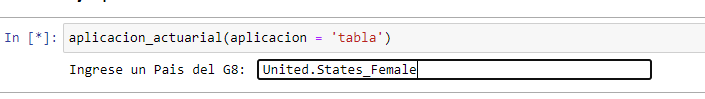

In [2]:
aplicacion_actuarial(aplicacion = 'tabla')

Ingrese un Pais del G8: United.States_Female
[1] "Lugar de ejecuciòn: Barcelona , Catalonia ES"
[1] "FECHA DE EJECUCIÒN: LUNEDÌ, DIC 14 22:08:19 2020"


edad,lx,dx,px,qx,Lx,mx,ex
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,100000,585,0.9941500,5.850000e-03,99707.5,5.867161e-03,80.54
1,99415,39,0.9996077,3.922949e-04,99395.5,3.923719e-04,80.01
2,99376,25,0.9997484,2.515698e-04,99363.5,2.516014e-04,79.04
3,99351,19,0.9998088,1.912412e-04,99341.5,1.912594e-04,78.06
4,99332,15,0.9998490,1.510087e-04,99324.5,1.510201e-04,77.08
5,99317,13,0.9998691,1.308940e-04,99310.5,1.309026e-04,76.09
6,99304,13,0.9998691,1.309111e-04,99297.5,1.309197e-04,75.10
7,99291,9,0.9999094,9.064266e-05,99286.5,9.064676e-05,74.11
8,99282,10,0.9998993,1.007232e-04,99277.0,1.007283e-04,73.12


# $Graficaciòn$

El Objetivo es ahora graficar de manerà interactiva una cohorte fémenina cualquiera de un paìs del G8. <br>
Simplemente pasando el ratòn por encima observaremos Edad = $x$, esperanza de vida abreviada = $e_{x}$ y cohorte en
cuestiòn = $l_{x}.$ <br>No sòlo, podemos también ver la joroba de mortalidad usando $q_{x}$.<br>
**Ejemplo: con las japonesas, francesas e italianas.**
#### Si no se lograrà visualizar el grafico de manera interactiva en la hoja corriente, los siguientes enlaces, lo permitiràn:<br>
**[Mujeres Japonesas](https://joevalencia.github.io/Estadistica_actuarial/Japan.html)**
, **[Mujeres Francesas](https://joevalencia.github.io/Estadistica_actuarial/France.html)** y **[Joroba Italiana](https://joevalencia.github.io/Estadistica_actuarial/Italianas.html)**

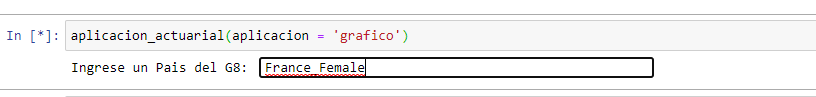

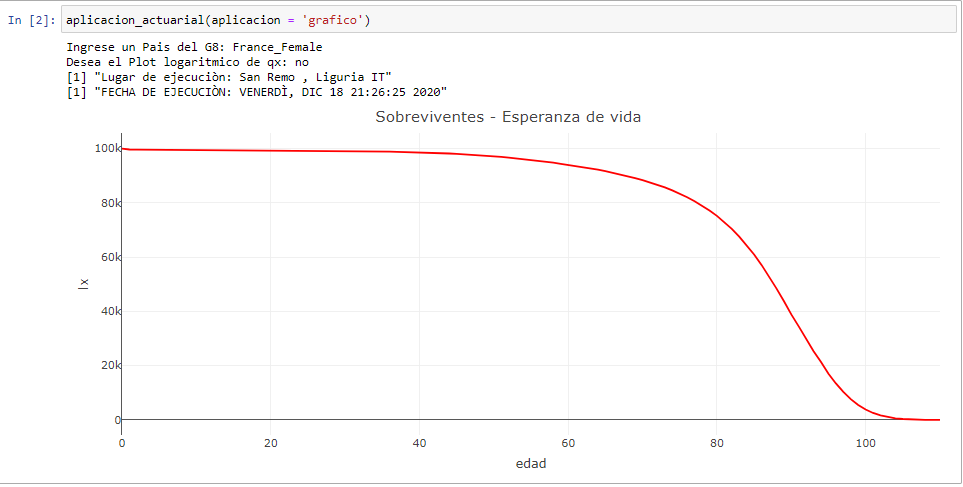

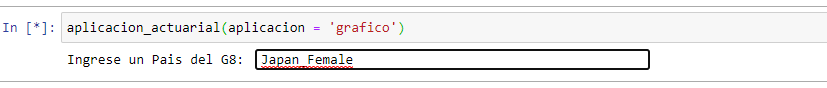

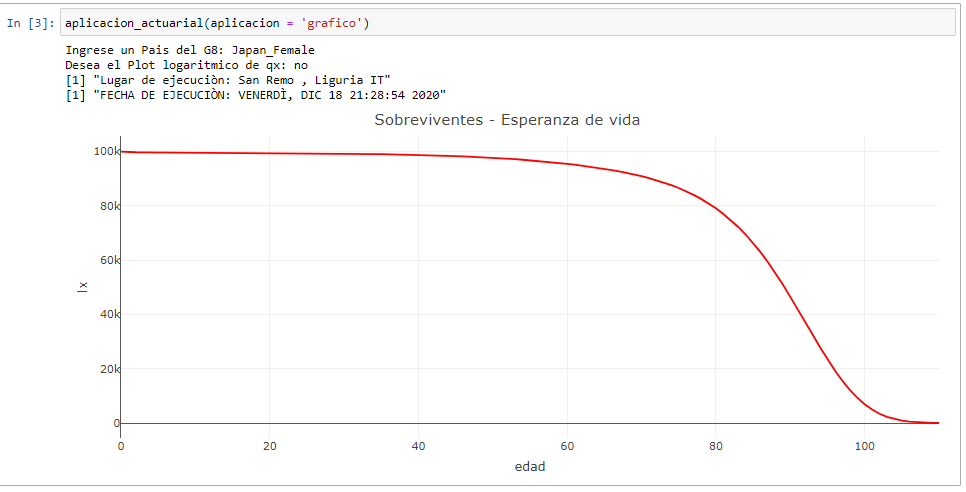

#### Joroba de mortalidad.
Aunque a menudo convenga dar un vistazo a la funciòn cohorte, otro plot de interés es sin duda el plot de $q_{x}$ para ver la 'joroba de mortalida'.<br>
Por ende, al programa, bastarà darle un "si" a la pregunta, si queremos el grafico en logartimo.<br>

Nòtese que los valores interactivos ahora son la edad del individuo $x$, la $q_{x}$ y siempre la esperanza de vida $e_{x}$.

Notamos que para las italianas joroba es poco pronunciada.

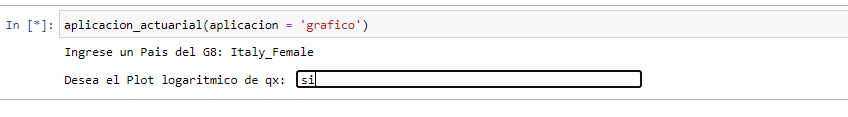

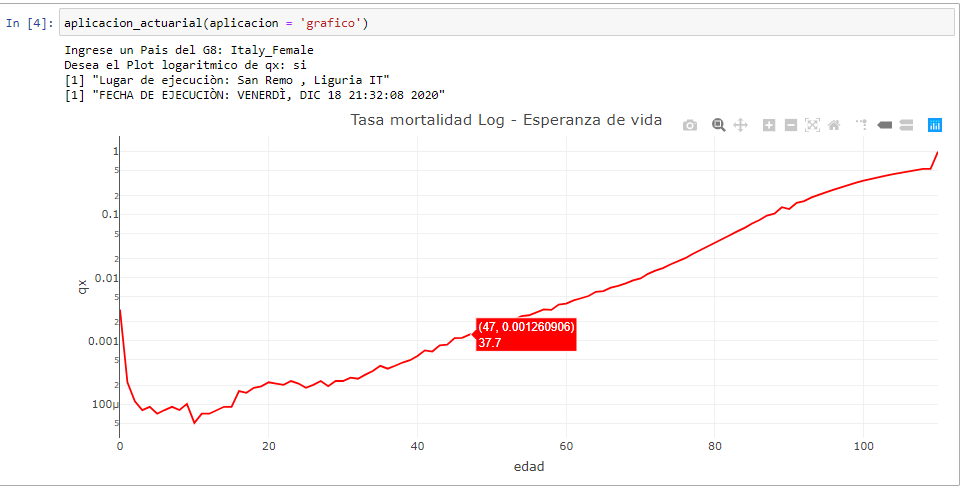

# $Conmutaciones$

Por ultimo, la aplicacion se propone de calcular la conmutaciones.<br> Aquì, se constata que debemos, ademàs de ingresar un paìs, imputar una tasa de interés. <br>Esto es, la conmutaciones permiten facilitar el càlculo actuarial.<br>
Entonces tendremos un segundo *input* y este serà un *float* que pedirà teclear una tipo de interés.<br>
**Ejemplo. las Rusas y Canadienses**

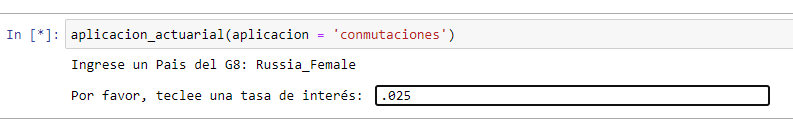

In [3]:
aplicacion_actuarial(aplicacion = 'conmutaciones')

Ingrese un Pais del G8: Russia_Female
Por favor, teclee una tasa de interés: .025
[1] "Lugar de ejecuciòn: Barcelona , Catalonia ES"
[1] "FECHA DE EJECUCIÒN: LUNEDÌ, DIC 14 22:09:15 2020"


lx,Cx,Dx,Nx,Mx,Rx,Sx
100000,703.41463,100000.00,3386310,17407.07,1135047.0,92301796
99279,70.43427,96857.56,3286310,16703.65,1117639.9,88915486
99205,41.78697,94424.75,3189453,16633.22,1100936.2,85629176
99160,27.17852,92079.92,3095028,16591.43,1084303.0,82439723
99130,27.39948,89806.89,3002948,16564.25,1067711.6,79344695
99099,24.14431,87589.08,2913141,16536.85,1051147.4,76341747
99071,22.71416,85428.61,2825552,16512.71,1034610.5,73428606
99044,19.69792,83322.27,2740123,16489.99,1018097.8,70603054
99020,19.21748,81270.33,2656801,16470.30,1001607.8,67862930
98996,16.40517,79268.90,2575531,16451.08,985137.5,65206129


In [4]:
aplicacion_actuarial(aplicacion = 'conmutaciones')

Ingrese un Pais del G8: Canada_Female
Por favor, teclee una tasa de interés: .0312
[1] "Lugar de ejecuciòn: Barcelona , Catalonia ES"
[1] "FECHA DE EJECUCIÒN: LUNEDÌ, DIC 14 22:09:48 2020"


lx,Cx,Dx,Nx,Mx,Rx,Sx
100000,462.567882,100000.00,3014839,8782.991,636008.1,78623413
99523,18.808068,96511.83,2914839,8320.424,627225.1,75608574
99503,12.767308,93572.96,2818327,8301.616,618904.7,72693735
99489,10.612303,90729.05,2724754,8288.848,610603.1,69875408
99477,8.576014,87973.34,2634025,8278.236,602314.2,67150654
99467,9.148192,85303.04,2546052,8269.660,594036.0,64516629
99456,4.838948,82712.96,2460749,8260.512,585766.3,61970577
99450,7.038811,80205.56,2378036,8255.673,577505.8,59509828
99441,6.067417,77771.82,2297830,8248.634,569250.1,57131792
99433,5.883841,75412.68,2220059,8242.567,561001.5,54833962


# $Conclusiones$ - $Consideraciones$

Es de particular relievo el hecho que con un *dataset* se pueda, mediante *aplicacion_actuarial*, visualizar el $Survival$ $Plot$,<br> calcular la tabla actuarial bàsica y las conmutaciones, simplemente tecleando la cohorte deseada.<br>
Por otro lado, el hecho de implementar la funciòn de R *readline*, hace que este proceso automatizado sea guìado, <br>
y por ende, arrojando mensajes como "Ingrese..." ayude quièn se propone de utilizarla.<br> Queda entendido que la se podrìan continuar implementando màs funciones, de todas formas como aplicaciòn bàsica resulta valida en cuanto:
* Grafica una cohorte de manera interactiva intentando ser informativa sobre el comportamiento de esta
* Calcula la tabla actuarial bàsica permitiendo obtener simplemente piediendo el paìs resultados como $q_{x}$, $p_{x}$, $e_{x}$,  etc...
* Calcula las conmutaciones, importantes para el calculo de productos actuariales de vida, simplemente tecleando pais y tasa de interés.

**El todo mediante un proceso de imputaciòn guìado**

Claramente, modificando el codigo, se podrìa consentir la operaciones apenas presentadas a las demàs cohorte <br>pero el objeto aqui fue principalmente hacer hincapié con las **G8**.<br>
Ultima consideraciòn es que la *aplicacion_actuarial* se apoya a otras librerias cuales *httr, data.table y plotly*.
<br> Queda claro de todas maneras que no hacen falta descargarlas de antemano porque la aplicacion detecta si estàn en el R <br>del usuario y las descargar desde el repositorio de manera automatica.

Nòtese aùn que el hecho de imprimir la fecha y el lugar desde donde se ejecuta la aplicaciòn puede resultar trivial pero, <br>considerese que las funciones cohortes cambian su comportamento a lo largo del tiempo.<br> De hecho la hipòtesis de estacionariedad del Modelo Biometrico clàsico se ve cuestionada ya que el progreso en campo médico<br> ha permitido que la esperanza de vida aumente.<br> Entonces, informar que una tabla fue càlculada en el 2020, resultarà ùtil si se decidirà hacer comparaciones en un pròximo futuro.<br>

# $Script$ $del$ $còdigo$
<a id='chicago'>

In [ ]:
### 18 buono 
aplicacion_actuarial <- function( aplicacion = 'tabla'){
  # Zittiendo le avvertenze - Apagando los mensages tediosos de upload
  duepalle <- getOption('warn')
  options(warn = -1)
  list.of.packages <- c('plotly', 'httr', 'data.table')
  new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,'Package'])]
  if(length(new.packages)) install.packages(new.packages)
  suppressMessages(library(data.table))
  suppressMessages(library(plotly))
  suppressMessages(library(httr))
    # caricamento del dataset
  cohortes_g20 <- read.csv('lifeTable.csv')
    # definizione dei valori delle femmine 
  paises <- colnames(cohortes_g20)
  hembra <- paises[c(30:length(paises))]
  uomini <- paises[c(2:29)]
  n2 <- c(57, 56, 34, 39, 43, 40, 44, 51)  
  hembrasg8 <- paises[n2]
  hembra <- cbind(hembrasg8, n2)
  # Chiamando alla funzione di imputazione - 
  m1 <- readline(prompt = 'Ingrese un Paìs del G8: ')
  if(m1 %in% hembra){
      
    z1 <- as.numeric(hembra[which(hembra==m1),2])
    f1 <- cohortes_g20[,z1]
    
  x1 <- shift(f1, -1); age <- 0:110
  x1 <- nafill(x1, fill = 0)
  px <- x1/f1;  qx <- 1- px
  dx <- f1*qx;  Lx <- (x1+f1)/2
  mx <- dx/Lx; #mx[length(mx)] <- 0 Alabama
  url <- "https://ipinfo.io/"
  a1 <- GET(url);a2 <- content(a1)
  a3 <- paste('Lugar de ejecuciòn:',a2$city,',',a2$region, a2$country)
  a4 <- paste('Fecha de ejecuciòn:',format(Sys.time(), "%A, %b %d %X %Y"))
  e <- c()
  for (i in 1:111){
    lex <- f1[i]
    e <- append(e,(sum(f1[i:length(f1)])/lex)-1)
}
  tab <- data.frame(matrix(c(age,f1,dx, px, qx, Lx, mx, round(e,2)), ncol = 8))
  colnames(tab) <- c('edad','lx', 'dx', 'px', 'qx', 'Lx', 'mx', 'ex')
  
      if((aplicacion!='tabla')|(aplicacion!='grafico')|(aplicacion!='conmutaciones')){
  if(aplicacion =='tabla'){
    
      print(a3);print(toupper(a4))
      return(tab)
  }else if (aplicacion =='grafico'){
    m11 <- readline(prompt = 'Desea el Plot logarìtmico de qx: ')
    print(a3);print(toupper(a4))
    if (m11 == 'no'){
      
      fig1 <- plot_ly(tab, x=~edad, y= ~lx, line = list(color='red'),
        type = 'scatter', mode='lines', text=~ex)
      fig1 <- fig1 %>% layout(title="Sobreviventes - Esperanza de vida")
      return(fig1)
    
    }else{
      
      fig2 <- plot_ly(tab, x=~edad, y= ~qx, line = list(color='red'),
                     type = 'scatter', mode='lines', text=~ex)
      fig2 <- fig2 %>% layout(title="Tasa mortalidad Log - Esperanza de vida") 
      fig2 <- layout(fig2, yaxis = list(type = "log"))
      # htmlwidgets::saveWidget(as_widget(fig2), "fig2.html") salvare - guardar el plot
      return(fig2)
      
    }
      
  }else if (aplicacion =='conmutaciones'){

      enter <- as.numeric(readline(prompt = "Por favor, teclee una tasa de interés: "))
      i <- enter
      ind <- 1:111
      Cx <- ((1+i)**(-ind)*dx)
      Dx <- (1+i)^(-age)*f1
      Nx <- c()

      for(h in ind){
        Nx <- append(Nx, sum(Dx[h:length(Dx)]))
}

      Mx <- c()
      for(j in ind){
        Mx <- append(Mx, sum(Cx[j:111]))
}

      Sx <- c()
      for(w in ind){
        Sx <- append(Sx, sum(Nx[w:110]))
}

      Rx <- c()
      for(u in ind){
        Rx <- append(Rx, sum(Mx[u:111]))
}
      con <- matrix(c(f1, Cx, Dx, Nx, Mx, Rx, Sx), ncol = 7)
      ros <- c('lx', 'Cx', 'Dx', 'Nx', 'Mx', 'Rx', 'Sx')
      colnames(con) <- ros
      print(a3);print(toupper(a4))
      return(con)
  }
      }  
    options(warn = duepalle)
}else{
      print('Solo se permite un paìs del G8. 
            Por favor, vuelva a teclear su elecciòn.')
  }
}